In [34]:
import os
print(os.listdir(DATA_DIR))

['creditcard.csv', 'PaySim_Synthetic_Mobile-Money_Simulator_dataset.csv']


In [35]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Path to raw data folder
DATA_DIR = Path("../data/raw")


In [36]:
cc = pd.read_csv(DATA_DIR / "creditcard.csv")
ps = pd.read_csv(DATA_DIR / "PaySim_Synthetic_Mobile-Money_Simulator_dataset.csv")

print("CreditCard shape:", cc.shape)
print("PaySim   shape:", ps.shape)

CreditCard shape: (284807, 31)
PaySim   shape: (6362620, 11)


In [37]:
# First few rows
display(cc.head())
display(ps.head())

# Count of missing values
print("Missing in CreditCard:\n", cc.isnull().sum())
print("\nMissing in PaySim:\n", ps.isnull().sum())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Missing in CreditCard:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Missing in PaySim:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [38]:
#This tells how imbalanced each dataset is 
print("CreditCard fraud rate:")
print(cc["Class"].value_counts(normalize=True))

print("\nPaySim fraud rate:")
print(ps["isFraud"].value_counts(normalize=True))

CreditCard fraud rate:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

PaySim fraud rate:
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


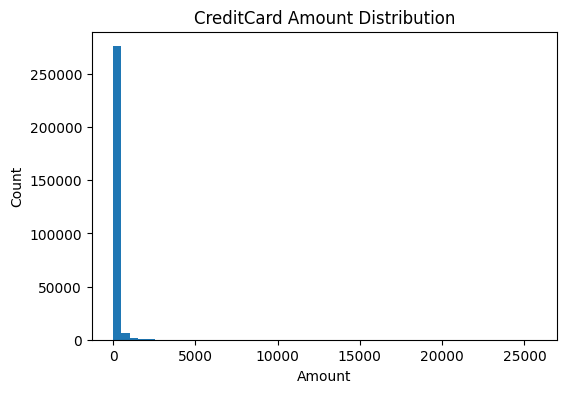

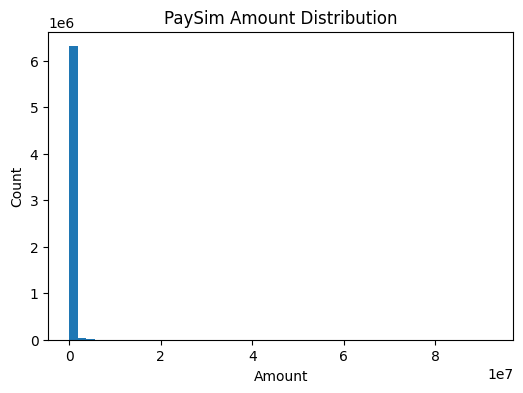

In [39]:
# CreditCard Amount
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(cc["Amount"], bins=50)
ax.set(title="CreditCard Amount Distribution", xlabel="Amount", ylabel="Count")
plt.show()

# PaySim amount (column may differ—adjust if needed)
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(ps["amount"], bins=50)
ax.set(title="PaySim Amount Distribution", xlabel="Amount", ylabel="Count")
plt.show()

In [40]:
# Descriptive stats for Amount and balances
display(cc["Amount"].describe().to_frame("CreditCard_Amount"))
display(ps[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].describe())


,CreditCard_Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


[Text(0.5, 1.0, 'CreditCard Amount (log-scaled count)'),
 Text(0.5, 0, 'Amount'),
 Text(0, 0.5, 'log(Count)')]

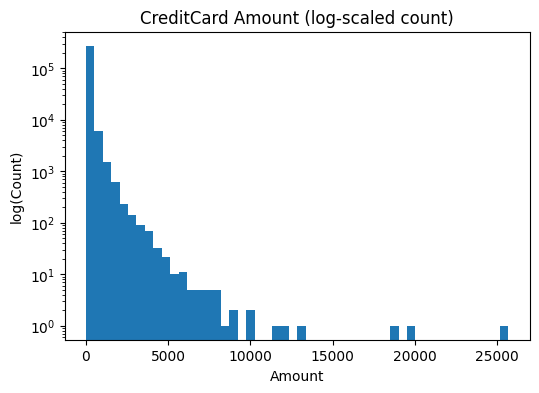

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(cc["Amount"].clip(lower=1), bins=50, log=True)
ax.set(title="CreditCard Amount (log-scaled count)", xlabel="Amount", ylabel="log(Count)")

In [42]:
ps[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].eq(0).mean()


amount            0.000003
oldbalanceOrg     0.330438
newbalanceOrig    0.567308
oldbalanceDest    0.425043
newbalanceDest    0.383401
dtype: float64